# Face Recognition with Olivetti Dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import model_selection

### Load the Dataset

In [32]:
data = np.load('../data/olivetti_faces.npy')
target_data = np.load('../data/olivetti_faces_target.npy')

print(f"Data shape: {data.shape}")
print(f"The dataset has {data.shape[0]} images")
print(f"Each image has a size of {data.shape[1]}x{data.shape[2]}")

Data shape: (400, 64, 64)
The dataset has 400 images
Each image has a size of 64x64


### See how make different faces the target data have

In [33]:
print(f"The target dataset has {len(np.unique(target_data))} differents faces")
print(f"The names of the faces are {np.unique(target_data)}")
print(f"Target data shape: {target_data.shape}")

The target dataset has 40 differents faces
The names of the faces are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Target data shape: (400,)


Reshape the target data

In [34]:
#target_data = target_data.reshape((400, 1,1)) # RESHAPE WRONG
print(f"Target data shape: {target_data.shape}")
print(target_data)
print(data)

Target data shape: (400,)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 

### Get 6 random people face from the data

[32, 31, 5, 6, 13, 22]


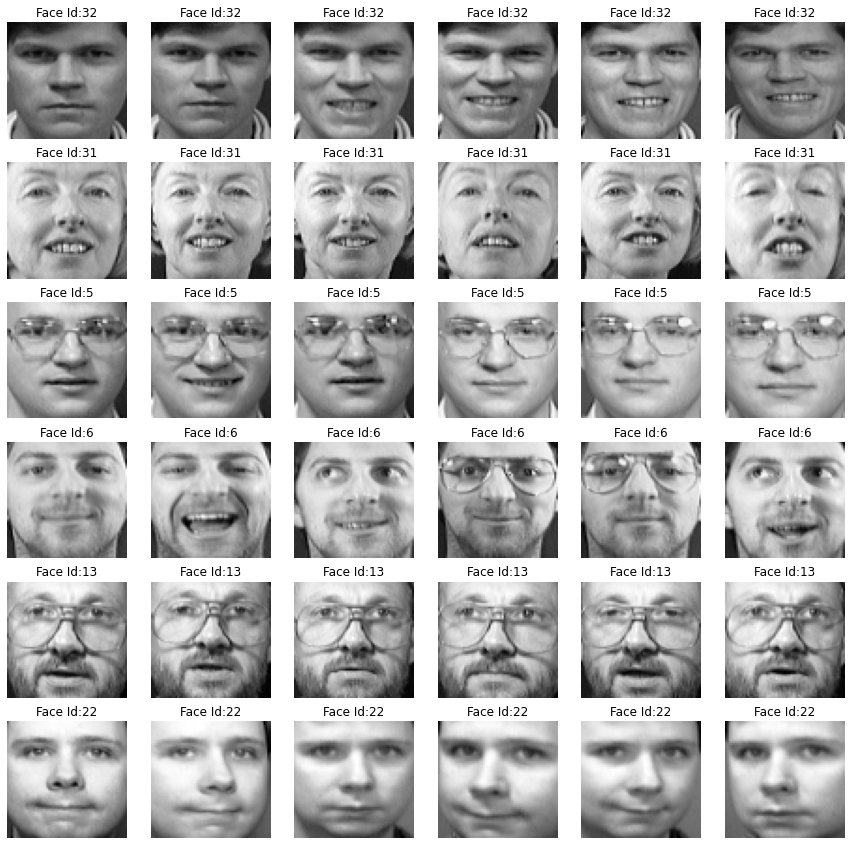

In [35]:
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

# get 6 random different faces
face_id = random.sample(range(0,40), rows)
print(face_id)

'''
face_id = set(face_id)
while len(face_id) < rows:
    face_id.add(random.randint(0, 39))
face_id = sorted(face_id)
print(face_id)
'''

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")

### Get all the target faces from the data

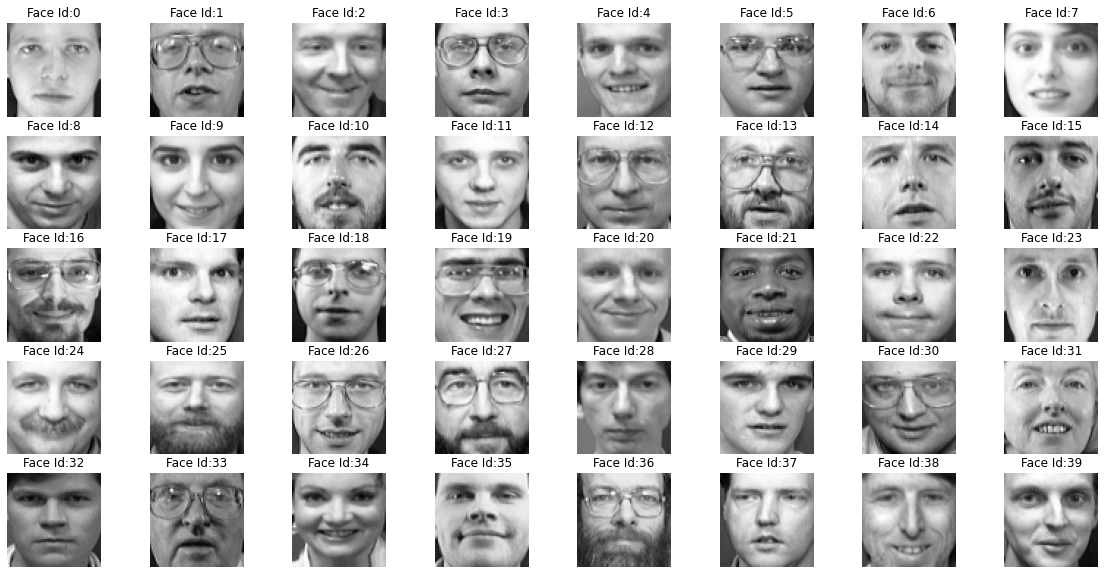

In [36]:
fig, axarr=plt.subplots(nrows=5, ncols=8, figsize=(20, 10))
axarr=axarr.flatten()

#iterating over user ids
for i in range(40):
    image_index=i * 10
    axarr[i].imshow(data[image_index], cmap="gray")
    axarr[i].set_title("Face Id:{}".format(i))
    axarr[i].axis("off")

### Get 6 random people face from the target data

In [37]:
'''
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

face_id = random.sample(range(0,40), rows)
print(face_id)

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(target_data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")
'''

'\nrows = 6\ncols = 6\n\nfig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))\n\nface_id = random.sample(range(0,40), rows)\nprint(face_id)\n\nfor i, face_id in enumerate(face_id):\n    for j in range(cols):\n        image_index=face_id * 10 + j\n        ax[i,j].imshow(target_data[image_index], cmap="gray", aspect="auto")\n        ax[i,j].set_title("Face Id:{}".format(face_id))\n        ax[i,j].axis("off")\n'

### Split Data into Train and Test

Convert matrix form (image data) to a vector 

In [38]:
data = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
print(f"Data shape: {data.shape}")

Data shape: (400, 4096)


In [39]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target_data, test_size=0.2, stratify=target_data)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (320, 4096)
X_test shape: (80, 4096)
y_train shape: (320,)
y_test shape: (80,)


### Normalization

In [40]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

### Distribuiton of the dataset


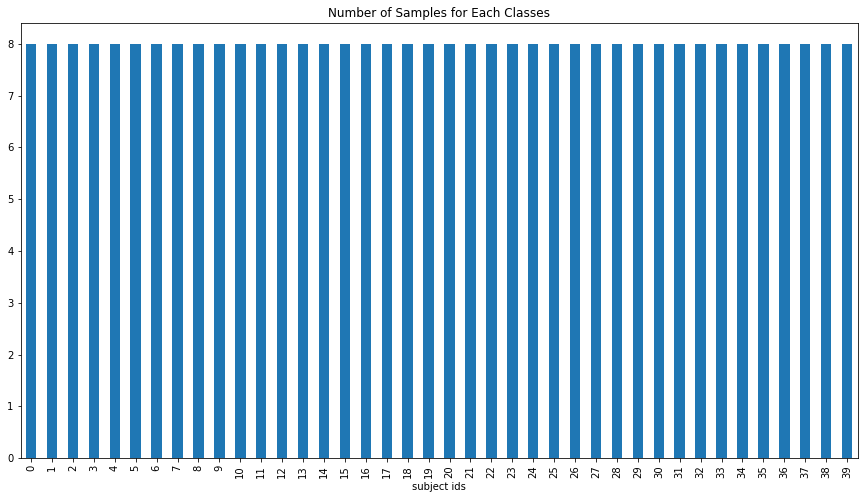

In [41]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

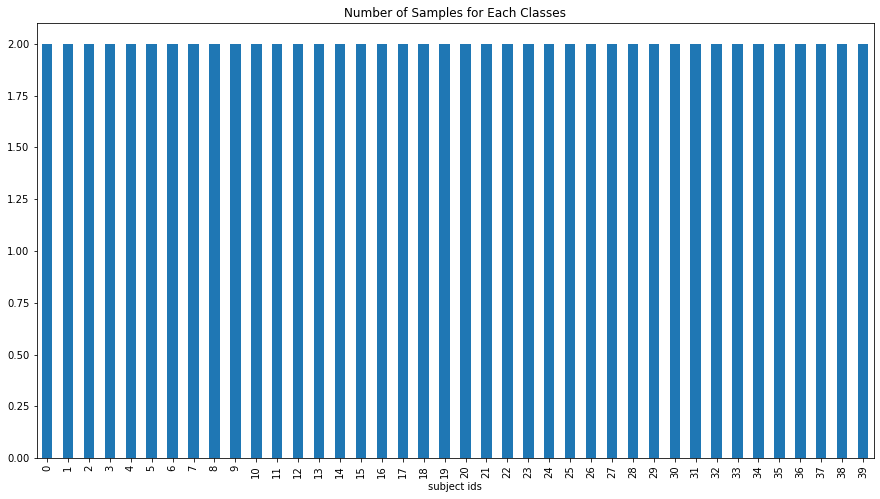

In [42]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_test
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

### PCA

In [43]:
from sklearn.decomposition import PCA

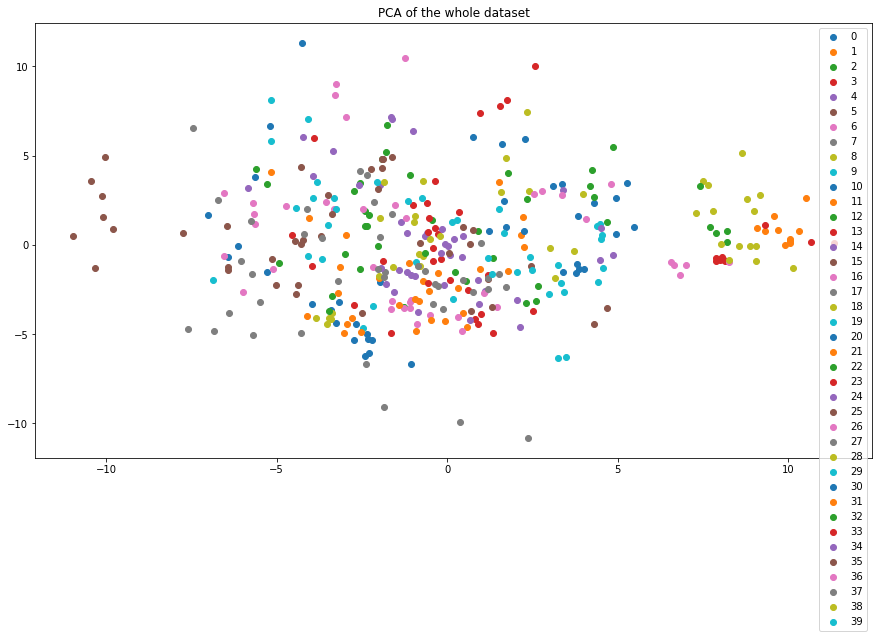

'\nfig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))\n\nax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")\nax.set_title("First Principal Component")\nax.axis("off")\n'

In [44]:
pca = PCA(n_components=2)
pca.fit(data)

X_pca = pca.transform(data)

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_pca[target_data == i, 0], X_pca[target_data == i, 1], label=i)
plt.title("PCA of the whole dataset")
plt.legend()
plt.show()

'''
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")
'''

Finding Optimum Number of Principle Component

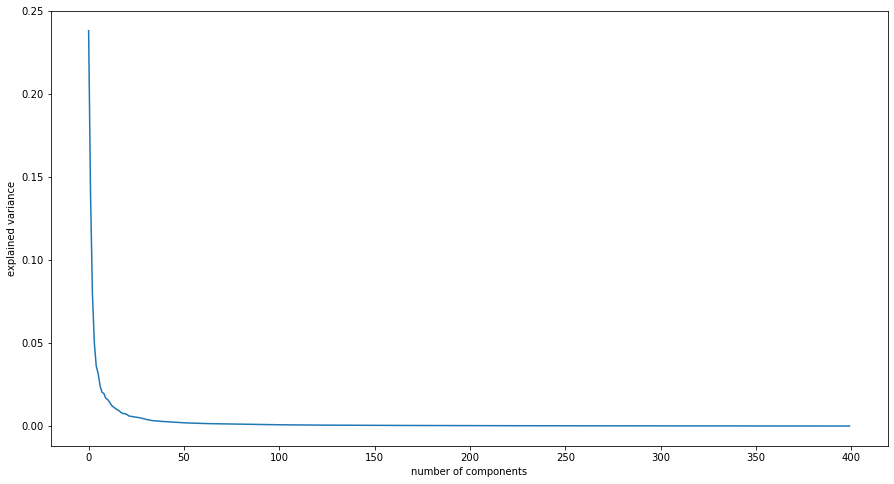

In [45]:
pca = PCA()
pca.fit(data)

plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

X_train_pca shape: (320, 50)
X_test_pca shape: (80, 50)
0.88042825


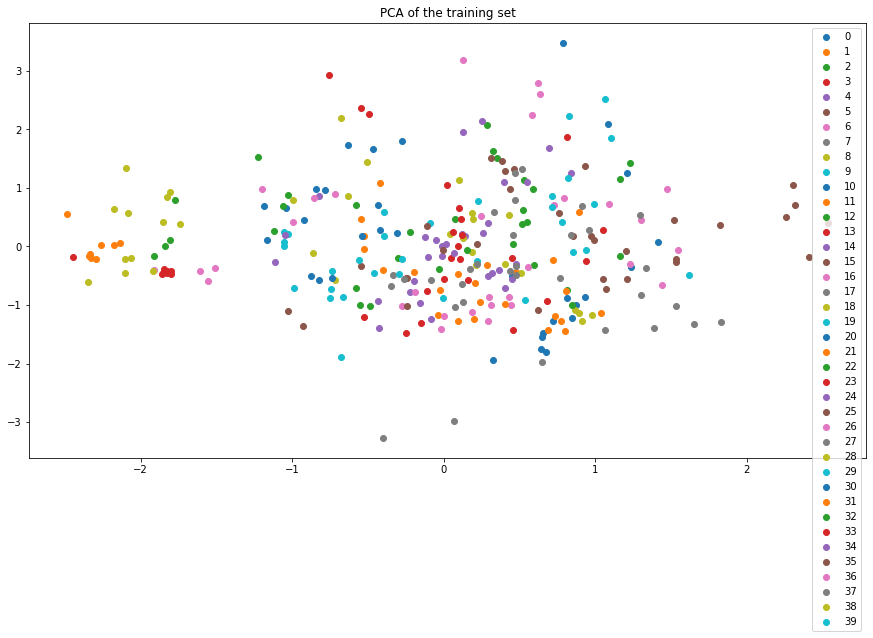

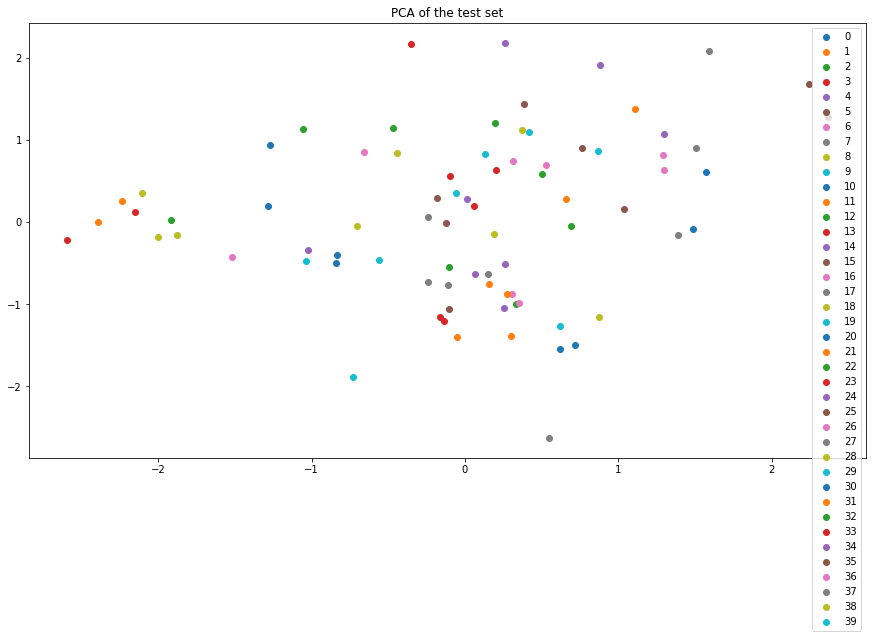

In [46]:
pca = PCA(n_components=50, whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")


print(pca.explained_variance_ratio_.sum())


plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)
plt.title("PCA of the training set")
plt.legend()
plt.show()

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)
plt.title("PCA of the test set")
plt.legend()
plt.show()

Show Average Face after PCA

(-0.5, 63.5, 63.5, -0.5)

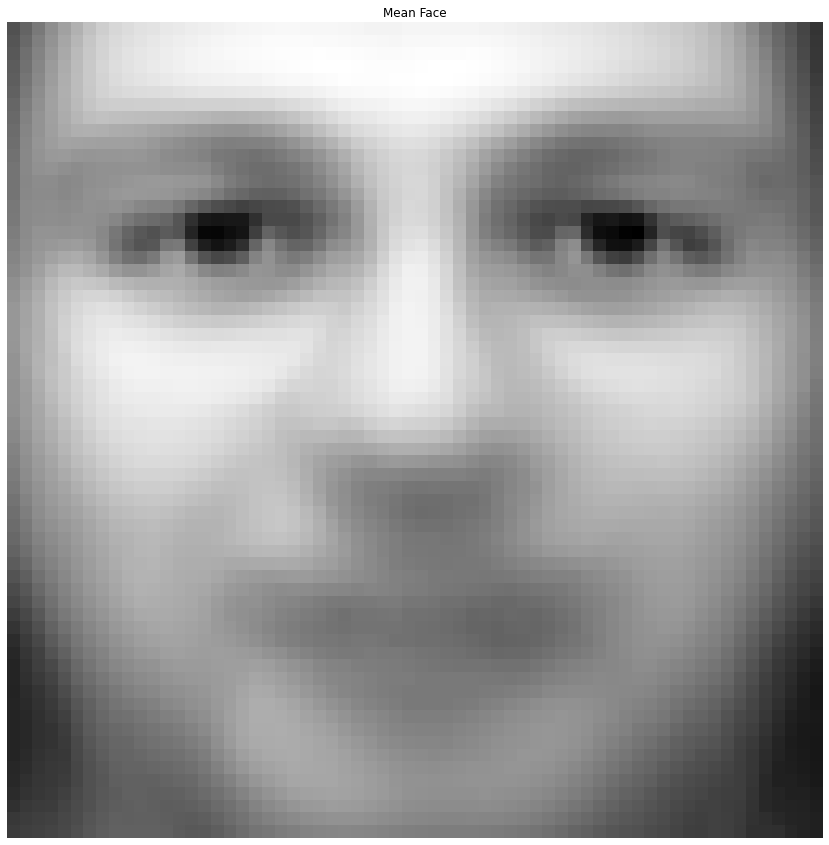

In [47]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_title("Mean Face")
ax.axis("off")

Show all faces after PCA

(4096,)


'\neigen_faces=pca.components_.reshape((number_of_eigenfaces, 64, 64))\nprint(number_of_eigenfaces)\nprint(eigen_faces.shape)\nprint(eigen_faces.size)\n\ncols = 10\nrows = int(number_of_eigenfaces / cols)\nfig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))\naxarr=axarr.flatten()\nfor i in range(number_of_eigenfaces):\n    print(i)\n    axarr[i].imshow(eigen_faces[i],cmap="gray")\n    axarr[i].set_title("eigen id:{}".format(i))\n'

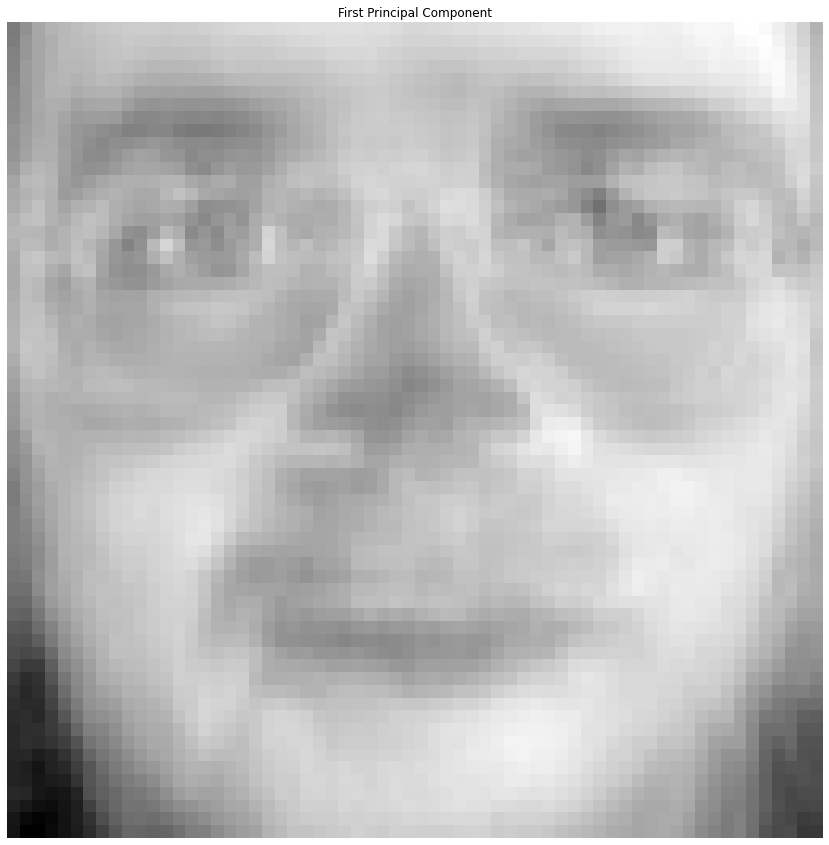

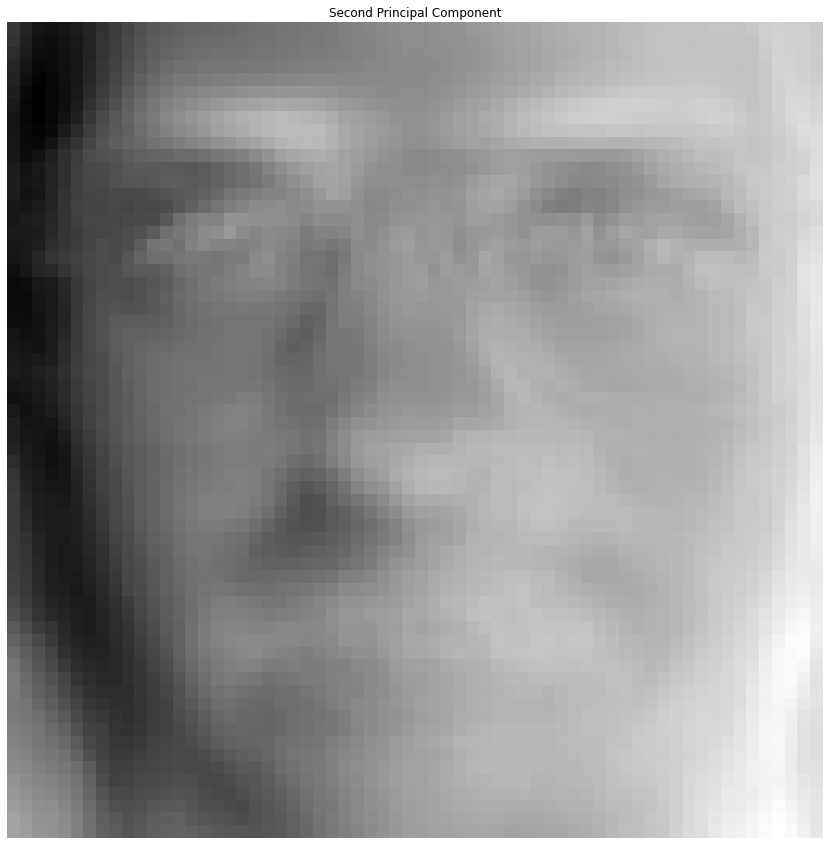

In [53]:
# show all faces after above PCA
number_of_eigenfaces=len(pca.components_)
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((number_of_eigenfaces, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((number_of_eigenfaces, 64, 64))[1], cmap="gray")
ax.set_title("Second Principal Component")
ax.axis("off")

'''
eigen_faces=pca.components_.reshape((number_of_eigenfaces, 64, 64))
print(number_of_eigenfaces)
print(eigen_faces.shape)
print(eigen_faces.size)

cols = 10
rows = int(number_of_eigenfaces / cols)
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    print(i)
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_title("eigen id:{}".format(i))
'''


### Models

Model training, Model hyper-parameter selection, confusion Matrix

In [19]:
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, validation_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, classification_report
import seaborn as sns
#from prettytable import PrettyTable


def train(model, X_train, X_test, y_train, y_test ):
    print("Training Model: ", model.__class__.__name__)
    model.fit(X_train, np.ravel(y_train))

    #Test Data
    y_pred = model.predict(X_test)
    test_data_acc = accuracy_score(y_test, y_pred)
    print("Accuracy on Test Data: ", test_data_acc)
    cm_test = confusion_matrix(y_test, y_pred)
    
    # Training Data
    y_pred_train = model.predict(X_train)
    train_data_acc = accuracy_score(y_train, y_pred_train)
    print("Accuracy on Train Data: ", train_data_acc)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    # Plot Confusion Matrix for Test and Train Data
    fig, ax=plt.subplots(1, 2, figsize=(15, 8))
    plt1 = sns.heatmap(cm_test, annot=True, fmt='d', ax=ax[0], cmap="Blues")
    plt1.set_title('Confusion matrix - Test data')
    plt1.set_ylabel('Actual label')
    plt1.set_xlabel('Predicted label')
    
    plt2 = sns.heatmap(cm_train, annot=True, fmt='d', ax=ax[1], cmap="Blues")
    plt2.set_title('Confusion matrix - Train data')
    plt2.set_ylabel('Actual label')
    plt2.set_xlabel('Predicted label')
    plt.show()
    
    # Classification Report for Test Data
    print(classification_report(y_test, y_pred))
    '''
    table_test = PrettyTable()
    table_test.title = "Classification Report for Test Data"
    table_test.subtitle = "rrr"
    table_test.field_names = ["Accuracy","Precision", "Recall", "F1-Score", "Support"]
    for k,v in classification_report(y_test, model.predict(X_test), output_dict=True).items():
       if k == 'weighted avg':
            table_test.add_row(["{:.3f}".format(test_data_acc), "{:.3f}".format(v['precision']), "{:.3f}".format(v['recall']), "{:.3f}".format(v['f1-score']), "{:.3f}".format(v['support'])])
    print(table_test)
    '''
                
    # Classification Report for Train Data
    print(classification_report(y_train, y_pred_train))
    '''
    table_train = PrettyTable()
    table_train.title = "Classification Report for Train Data"
    table_train.field_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Support"]
    for k,v in classification_report(y_train, model.predict(X_train), output_dict=True).items():
        if k == 'weighted avg':
            table_train.add_row(["{:.3f}".format(train_data_acc), "{:.3f}".format(v['precision']), "{:.3f}".format(v['recall']), "{:.3f}".format(v['f1-score']), "{:.3f}".format(v['support'])])
    print(table_train)
    '''
    
    print("\n---------------------------------\n---------------------------------\n")
    
def hyper_parameter(hypertuned_model, parameters, X_train, y_train):
    print("Hyper Parameter Tuning for :", hypertuned_model.__class__.__name__)
    model = GridSearchCV(hypertuned_model, parameters, scoring="accuracy")
    model.fit(X_train, np.ravel(y_train))
    print(" Best Params: ", model.best_params_)
    return model.best_params_

def k_fold_cross_validation(model, k , X_train, y_train):
    print("K-Fold Cross Validation for :", model.__class__.__name__)
    kfold = KFold(n_splits=k, shuffle=True)
    scores = cross_validate(model, X_train, np.ravel(y_train), scoring="accuracy", cv=k, return_estimator=True)
    return scores["estimator"][np.argmax(scores["test_score"])]

def validationCurve(parameter_list, parameter_name, X_train, y_train, model):
    print("Validation Curve for :", model.__class__.__name__)
    train_scores, valid_scores = validation_curve(model, X_train, np.ravel(y_train), param_name = parameter_name, param_range = parameter_list, cv=5, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)

    plt.plot(parameter_list, train_scores_mean, label = "Train", color = 'b')
    plt.plot(parameter_list, test_scores_mean, label = "Cross Validation", color = 'r')
    plt.title("Validation Curve")
    plt.xlabel(parameter_name)
    plt.ylabel("Score")
    plt.legend()
    plt.show()

#### Logistic Regression

Logistic Regression - Base Model
Training Model:  LogisticRegression
Accuracy on Test Data:  0.9625
Accuracy on Train Data:  1.0


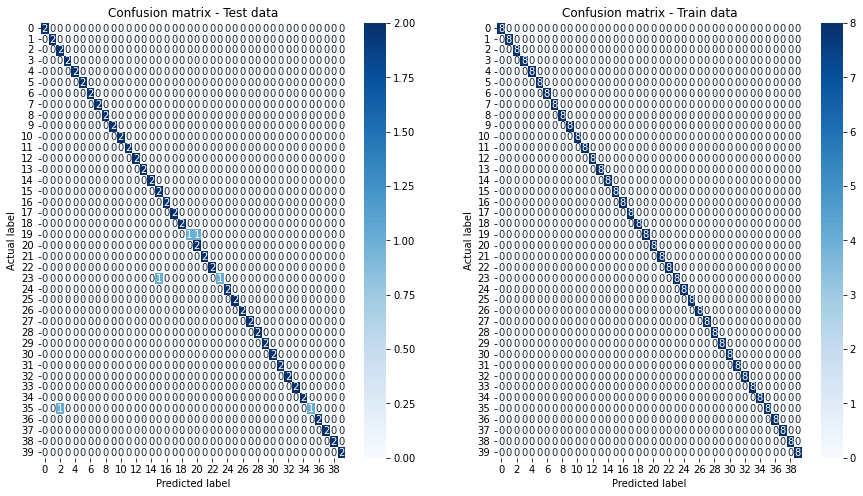

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         2
          17       1.00    

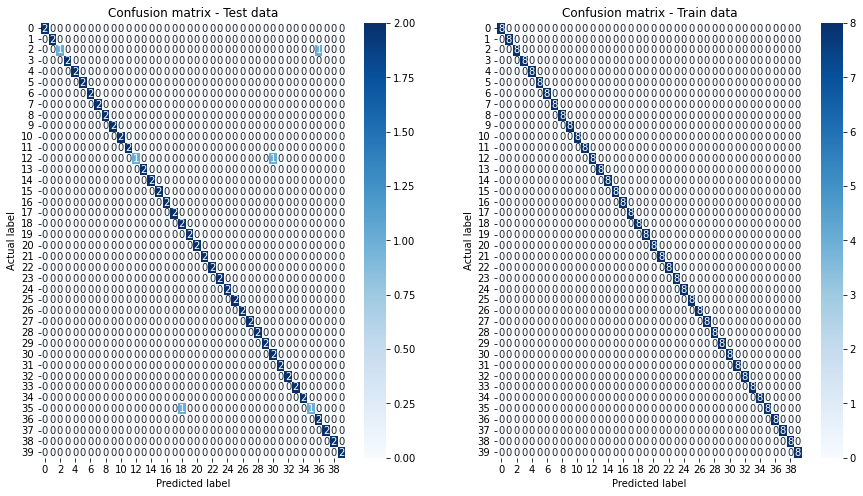

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

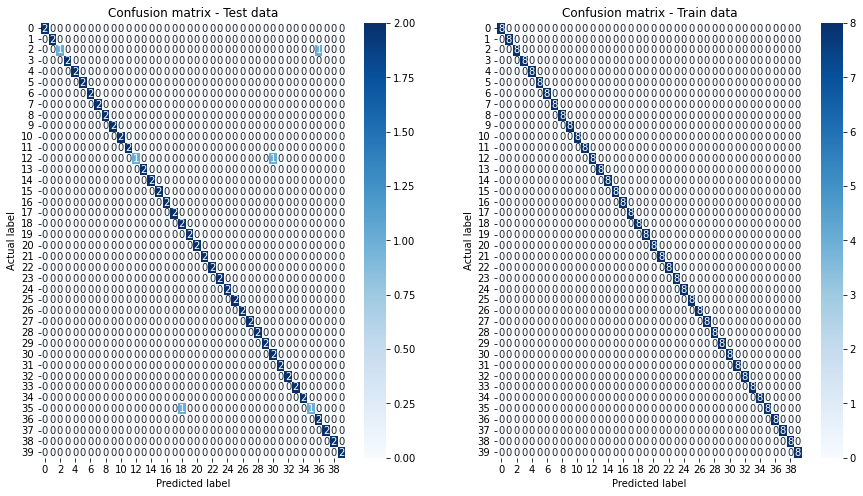

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

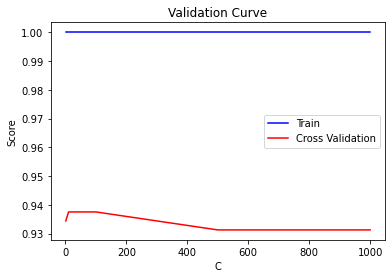

In [22]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()

print("Logistic Regression - Base Model")
train(logisticRegression, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

logisticRegressionHyperTuned = LogisticRegression()
parameters =  [{'solver': ['liblinear'], 'max_iter': [100, 500, 700], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': ['balanced'], 'penalty': ['l1', 'l2']}]
best_params = hyper_parameter(logisticRegressionHyperTuned, parameters, X_train_pca, y_train)
logisticRegressionHyperTuned.set_params(**best_params)
train(logisticRegressionHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

logisticRegressionKfmodel = k_fold_cross_validation(logisticRegressionHyperTuned, 5, X_train_pca, y_train)
train(logisticRegressionKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([1, 10, 100, 500, 1000]), 'C', X_train_pca, y_train, logisticRegressionKfmodel)

#### SVM

SVM - Base Model
Training Model:  SVC
Accuracy on Test Data:  0.9625
Accuracy on Train Data:  1.0


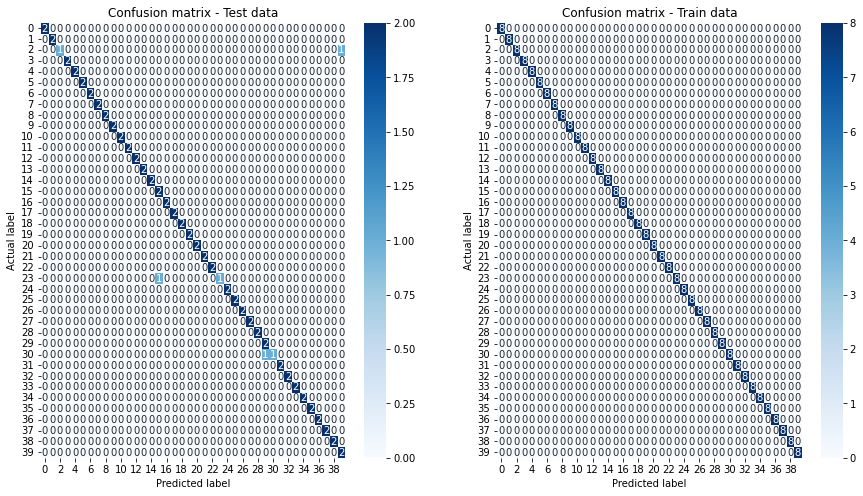

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         2
          17       1.00    

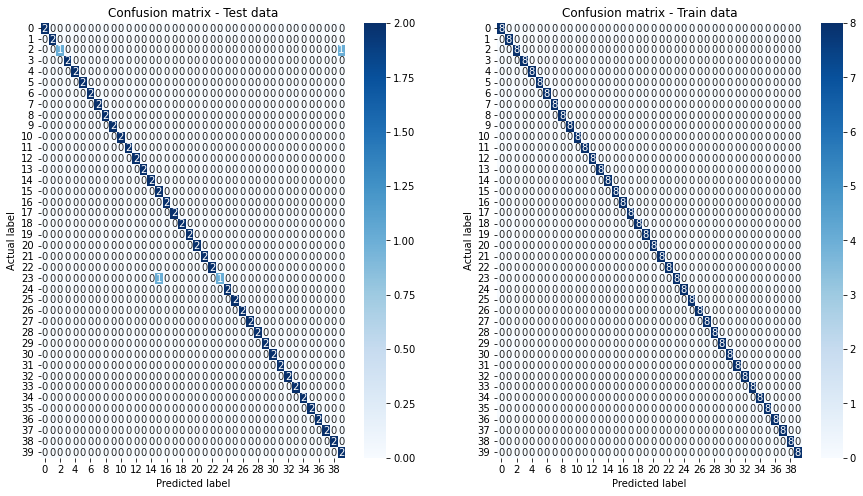

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         2
          17       1.00    

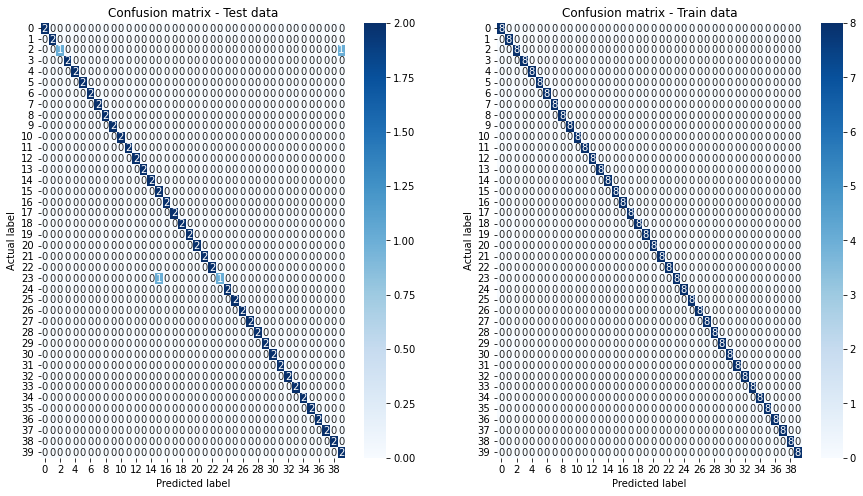

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         2
          17       1.00    

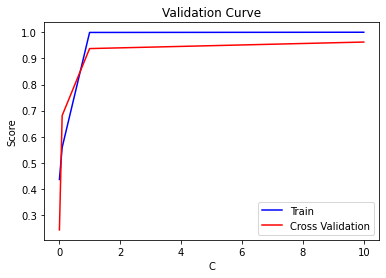

Validation Curve for : SVC


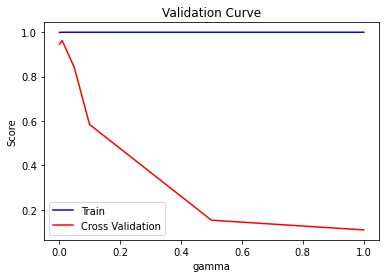

In [23]:
from sklearn.svm import SVC
svc = SVC()

print("SVM - Base Model")
train(svc, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

svcHyperTuned = SVC()
parameters = [{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1], 'C': [0.01, 0.1, 1, 10, 50, 75, 100, 250, 500, 750, 1000], 'class_weight': ['balanced']}]
best_params = hyper_parameter(svcHyperTuned, parameters, X_train_pca, y_train)
svcHyperTuned.set_params(**best_params)
train(svcHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

svcKfmodel = k_fold_cross_validation(svcHyperTuned, 5, X_train_pca, y_train)
train(svcKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([0.01, 0.1, 1, 10]), "C", X_train_pca, y_train, svcKfmodel)
validationCurve(np.array([0.001, 0.01, 0.05, 0.1, 0.5, 1]), "gamma", X_train_pca, y_train, svcKfmodel)

#### Gaussian Naive Bayes

Gaussian Naive Bayes - Base Model
Training Model:  GaussianNB
Accuracy on Test Data:  0.925
Accuracy on Train Data:  1.0


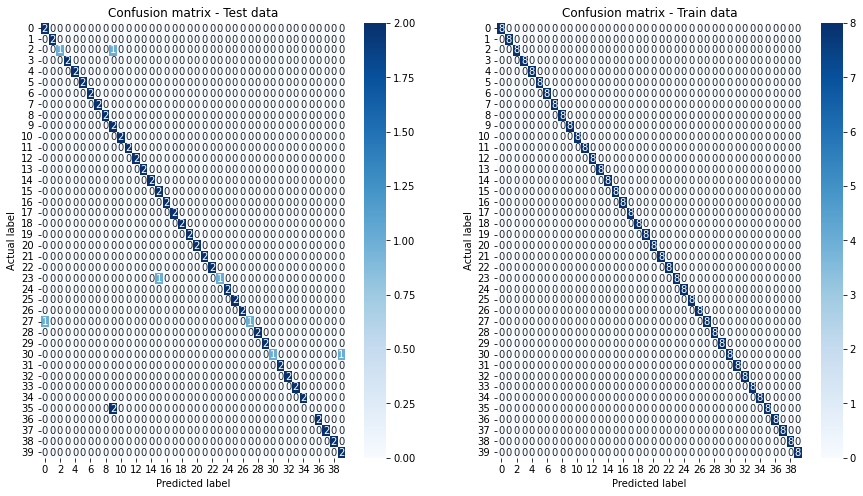

/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.40      1.00      0.57         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         2
          17       1.00    

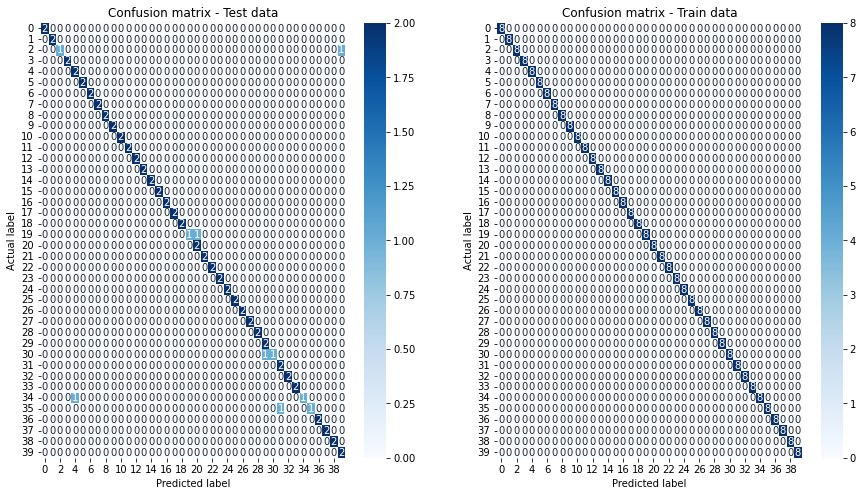

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

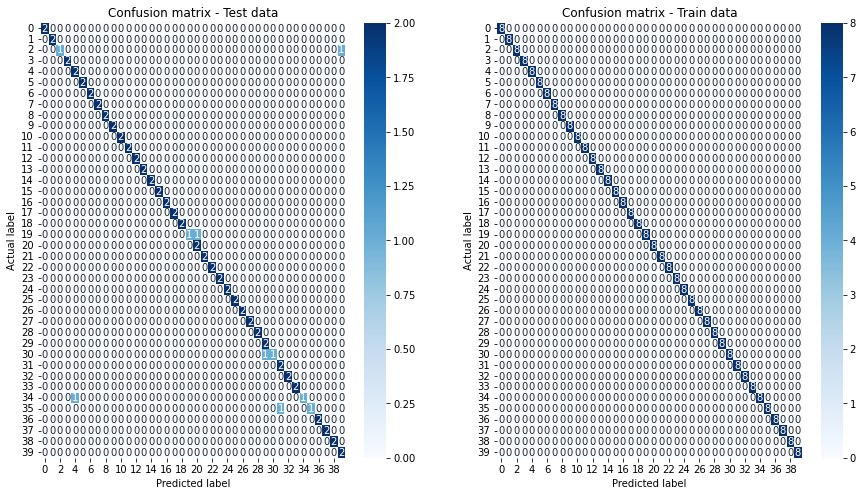

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

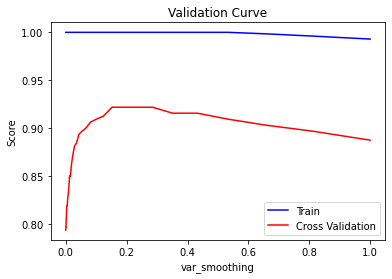

In [24]:
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()

print("Gaussian Naive Bayes - Base Model")
train(gaussianNB, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

gaussianNBHyperTuned = GaussianNB()
parameters = [{'var_smoothing': np.logspace(0,-9, num=100)}]
best_params = hyper_parameter(gaussianNBHyperTuned, parameters, X_train_pca, y_train)
gaussianNBHyperTuned.set_params(**best_params)
train(gaussianNBHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

gaussianNBKfmodel = k_fold_cross_validation(gaussianNBHyperTuned, 5, X_train_pca, y_train)
train(gaussianNBKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.logspace(0,-9, num=100), "var_smoothing", X_train_pca, y_train, gaussianNBKfmodel)

#### Decision Tree

Decision Tree Classifier - Base Model
Training Model:  DecisionTreeClassifier
Accuracy on Test Data:  0.5875
Accuracy on Train Data:  1.0


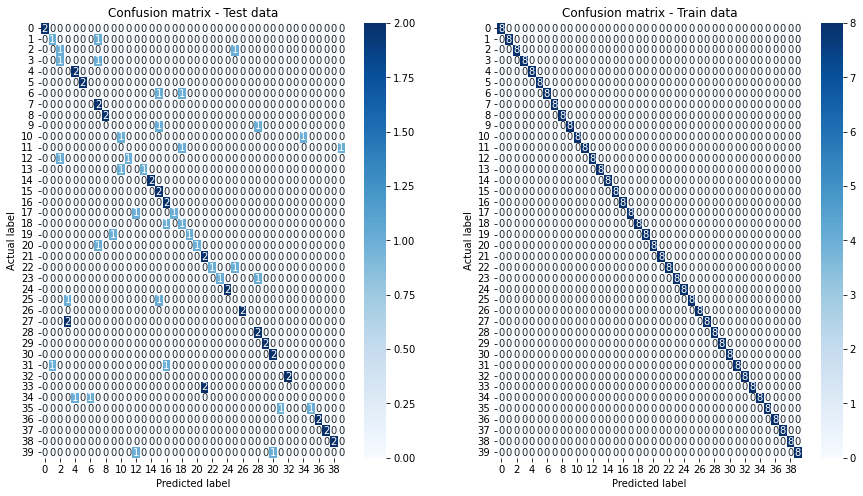

/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      0.50      0.50         2
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         2
           7       0.40      1.00      0.57         2
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         2
          10       0.50      0.50      0.50         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         2
          15       0.40      1.00      0.57         2
          16       0.50      1.00      0.67         2
          17       1.00    

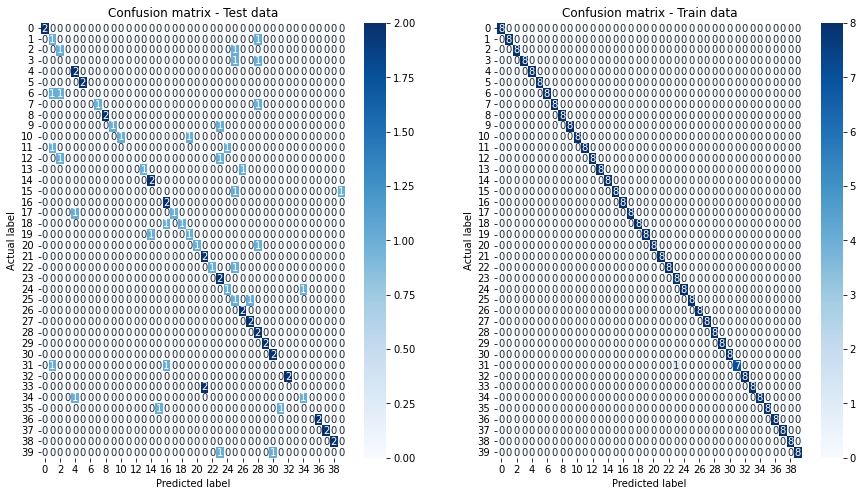

/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.25      0.50      0.33         2
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         2
           4       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       0.67      1.00      0.80         2
          15       0.00      0.00      0.00         2
          16       0.50      1.00      0.67         2
          17       1.00    

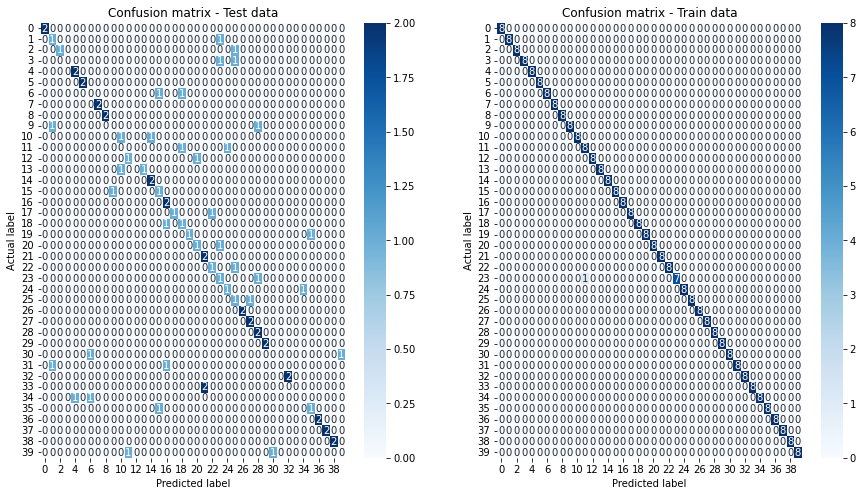

/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.33      0.50      0.40         2
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         2
          10       0.50      0.50      0.50         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       0.67      1.00      0.80         2
          15       0.33      0.50      0.40         2
          16       0.50      1.00      0.67         2
          17       1.00    

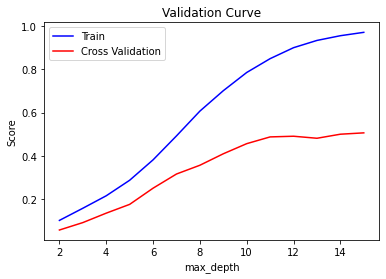

Validation Curve for : DecisionTreeClassifier


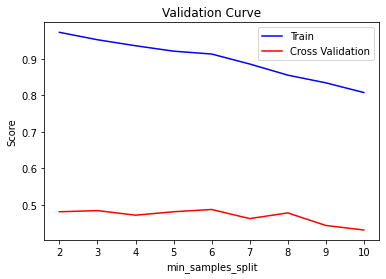

Validation Curve for : DecisionTreeClassifier


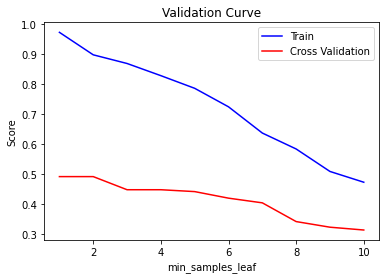

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

print("Decision Tree Classifier - Base Model")
train(dtc, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

dtcHyperTuned = DecisionTreeClassifier()
parameters = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
best_parameters = hyper_parameter(dtcHyperTuned, parameters, X_train_pca, y_train)
dtcHyperTuned.set_params(**best_parameters)
train(dtcHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

dtcKfmodel = k_fold_cross_validation(dtcHyperTuned, 5, X_train_pca, y_train)
train(dtcKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]), "max_depth", X_train_pca, y_train, dtcKfmodel)
validationCurve(np.array([2, 3, 4, 5, 6, 7, 8, 9, 10]), "min_samples_split", X_train_pca, y_train, dtcKfmodel)
validationCurve(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), "min_samples_leaf", X_train_pca, y_train, dtcKfmodel)

#### k-Nearest Neighbor (k-NN) classifier

KNN - Base Model
Training Model:  KNeighborsClassifier
Accuracy on Test Data:  0.875
Accuracy on Train Data:  0.925


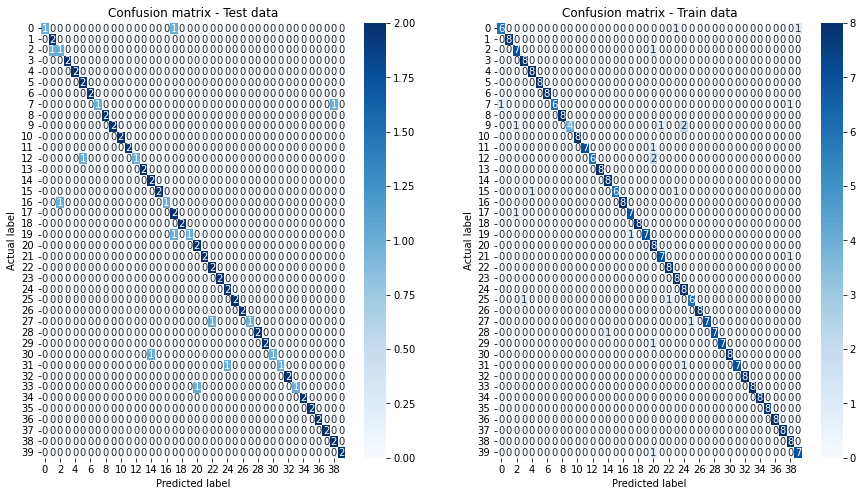

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
          17       0.50    

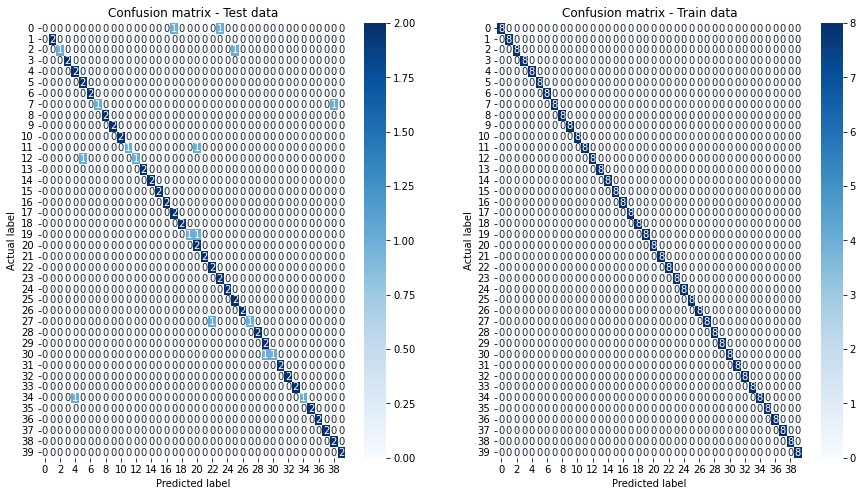

/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       0.67    

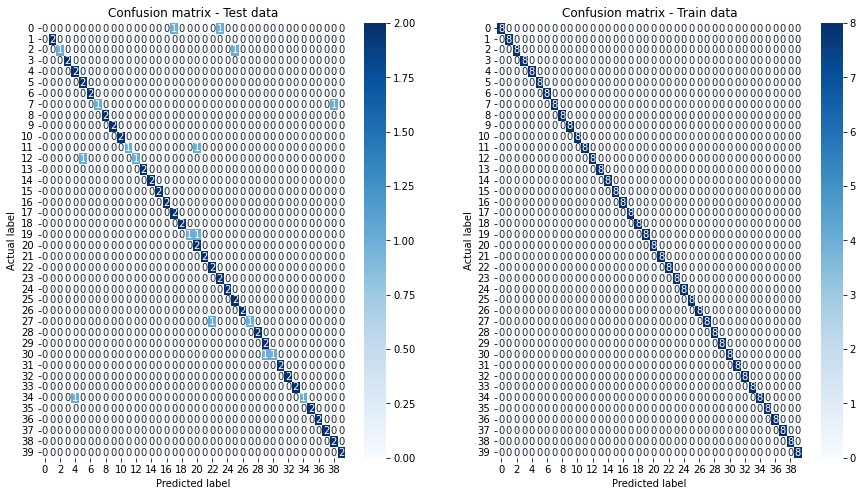

/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       0.67    

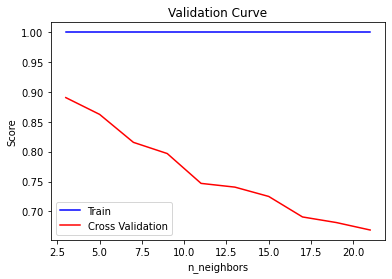

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

print("KNN - Base Model")
train(knn, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

knnHyperTuned = KNeighborsClassifier()
parameters = [{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
best_parameters = hyper_parameter(knnHyperTuned, parameters, X_train_pca, y_train)
knnHyperTuned.set_params(**best_parameters)
train(knnHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

knnKfmodel = k_fold_cross_validation(knnHyperTuned, 5, X_train_pca, y_train)
train(knnKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21]), "n_neighbors", X_train_pca, y_train, knnKfmodel)

#### Linear Discriminant Analysis

Linear Discriminant Analysis - Base Model
Training Model:  LinearDiscriminantAnalysis
Accuracy on Test Data:  0.9875
Accuracy on Train Data:  1.0


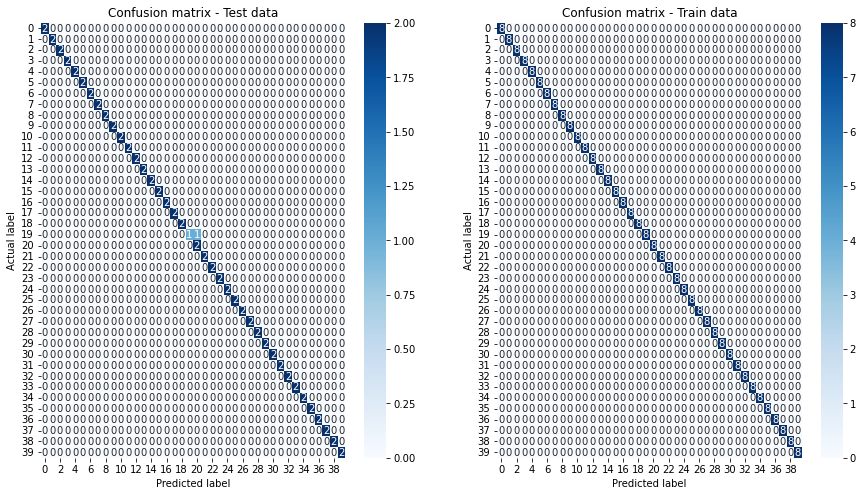

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/home/eva/anaconda3/lib/python3

 Best Params:  {'shrinkage': None, 'solver': 'svd'}
Training Model:  LinearDiscriminantAnalysis
Accuracy on Test Data:  0.9875
Accuracy on Train Data:  1.0


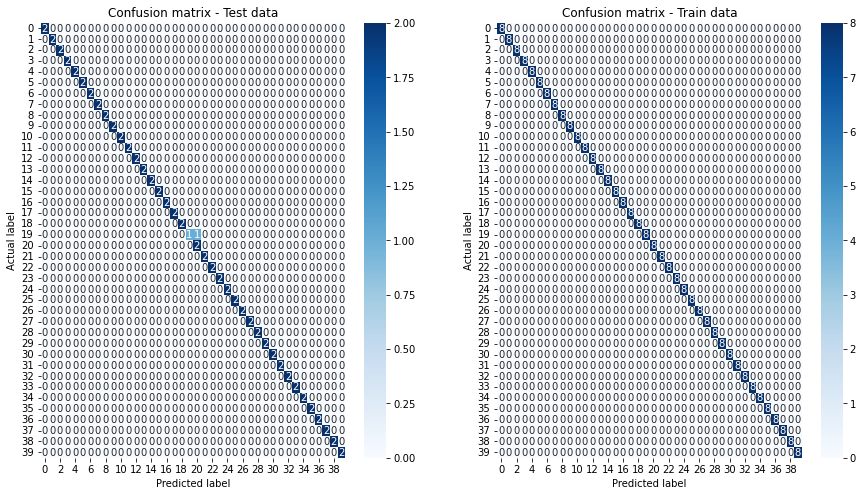

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

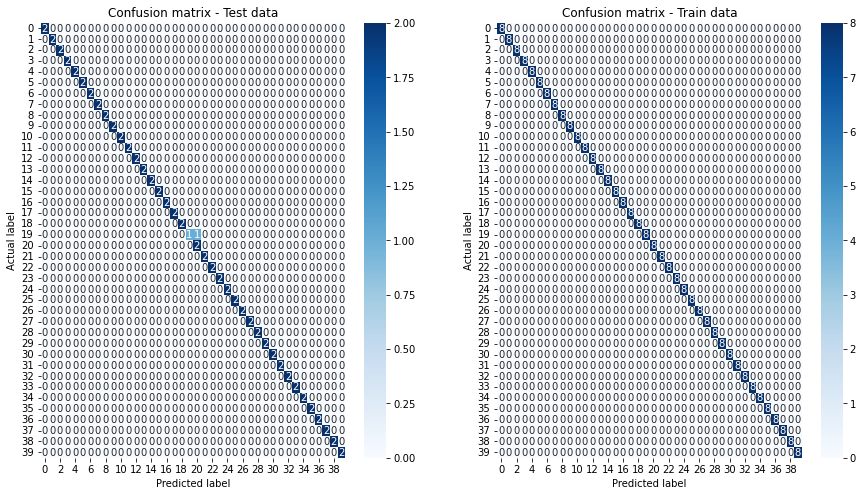

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

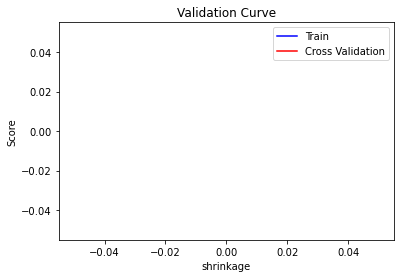

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

print("Linear Discriminant Analysis - Base Model")
train(lda, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

ldsHyperTuned = LinearDiscriminantAnalysis()
parameters = {'solver':('svd', 'lsqr', 'eigen'), 'shrinkage':[None, 'auto']}
best_lds_params = hyper_parameter(ldsHyperTuned, parameters, X_train_pca, y_train)
ldsHyperTuned.set_params(**best_lds_params)
train(ldsHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

ldaKfmodel = k_fold_cross_validation(ldsHyperTuned, 5, X_train_pca, y_train)
train(ldaKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]), "shrinkage", X_train_pca, y_train, ldaKfmodel)

### Deep Learning

In [21]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

(320, 50)
(320,)
(80, 50)
(80,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               26112     
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)     

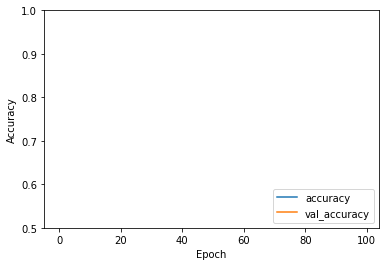

In [59]:
# CONVOLUTIONAL NEURAL NETWORKS

print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])   

history = model.fit(X_train_pca, y_train, epochs=100, batch_size=32, validation_data=(X_test_pca, y_test))

test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print('Test accuracy:', test_acc)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [56]:
'''
model = models.Sequential() #step 1
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same')) #step2
model.add(Activation('relu'))  # step3
model.add(MaxPooling2D(pool_size=2)) #step4
model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 32
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
model.add(Dropout(0.3)) # step5
model.add(Flatten()) #step 6
model.add(Dense(150)) #step 7
model.add(Activation('relu')) # setp 3
model.add(Dropout(0.4)) # step 5
model.add(Dense(81,activation = 'softmax')) # setp3 and step7. but this time, we are using activation function as softmax (if we train on two classes then we set sigmoid)
'''


"\nmodel = models.Sequential() #step 1\nmodel.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same')) #step2\nmodel.add(Activation('relu'))  # step3\nmodel.add(MaxPooling2D(pool_size=2)) #step4\nmodel.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 32\nmodel.add(MaxPooling2D(pool_size=2)) #repeating step 4 again\nmodel.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64\nmodel.add(MaxPooling2D(pool_size=2)) #repeating step 4 again\nmodel.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64\nmodel.add(MaxPooling2D(pool_size=2)) #repeating step 4 again\nmodel.add(Dropout(0.3)) # step5\nmodel.add(Flatten()) #step 6\nmodel.add(Dense(150)) #step 7\nmodel.add(Activation('relu')) # setp 3\nmodel.add(Dropout(0.4)) # step 5\nmodel.a

In [57]:
#model.summary()

In [49]:
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [51]:
'''
from sklearn import preprocessing

labels_test = preprocessing.label_binarize(y_test, classes=[i for i in range(len(y_test))])
labels_train = preprocessing.label_binarize(y_train, classes=[i for i in range(len(y_train))])

history = model.fit(X_train,labels_train,
        batch_size = 32,
        epochs=30,
        validation_data=(X_test, labels_test),
        verbose=2, shuffle=True)
'''


Epoch 1/30


ValueError: in user code:

    File "/home/eva/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/eva/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/eva/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/eva/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/eva/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/eva/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 100, 100, 3), found shape=(32, 4096)


In [20]:
'''
# CONVOLUTIONAL NEURAL NETWORKS
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 40
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),    
                    activation='relu',
                    input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,

                optimizer=keras.optimizers.Adadelta(),

                metrics=['accuracy'])

model.fit(X_train, y_train,

            batch_size=batch_size,

            epochs=epochs,

            verbose=1,

            validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])
'''

2023-01-19 19:05:43.588376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 19:05:44.092927: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-19 19:05:44.092945: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-19 19:05:45.592599: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

ValueError: cannot reshape array of size 1310720 into shape (320,28,28,1)

In [ ]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

model.evaluate(X_test, y_test)
'''